In [1]:
pip install ucimlrepo

In [16]:
from ucimlrepo import fetch_ucirepo

# fetch dataset
bank_marketing = fetch_ucirepo(id=222)

# data (as pandas dataframes)
X = bank_marketing.data.features
y = bank_marketing.data.targets

# metadata
print(bank_marketing.metadata)

# variable information
print(bank_marketing.variables)


{'uci_id': 222, 'name': 'Bank Marketing', 'repository_url': 'https://archive.ics.uci.edu/dataset/222/bank+marketing', 'data_url': 'https://archive.ics.uci.edu/static/public/222/data.csv', 'abstract': 'The data is related with direct marketing campaigns (phone calls) of a Portuguese banking institution. The classification goal is to predict if the client will subscribe a term deposit (variable y).', 'area': 'Business', 'tasks': ['Classification'], 'characteristics': ['Multivariate'], 'num_instances': 45211, 'num_features': 16, 'feature_types': ['Categorical', 'Integer'], 'demographics': ['Age', 'Occupation', 'Marital Status', 'Education Level'], 'target_col': ['y'], 'index_col': None, 'has_missing_values': 'yes', 'missing_values_symbol': 'NaN', 'year_of_dataset_creation': 2014, 'last_updated': 'Fri Aug 18 2023', 'dataset_doi': '10.24432/C5K306', 'creators': ['S. Moro', 'P. Rita', 'P. Cortez'], 'intro_paper': {'ID': 277, 'type': 'NATIVE', 'title': 'A data-driven approach to predict the s

In [17]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
df = pd.concat([X, y], axis=1)
df.head()

age           job  marital  education default  balance housing loan  \
0   58    management  married   tertiary      no     2143     yes   no   
1   44    technician   single  secondary      no       29     yes   no   
2   33  entrepreneur  married  secondary      no        2     yes  yes   
3   47   blue-collar  married        NaN      no     1506     yes   no   
4   33           NaN   single        NaN      no        1      no   no   

  contact  day_of_week month  duration  campaign  pdays  previous poutcome   y  
0     NaN            5   may       261         1     -1         0      NaN  no  
1     NaN            5   may       151         1     -1         0      NaN  no  
2     NaN            5   may        76         1     -1         0      NaN  no  
3     NaN            5   may        92         1     -1         0      NaN  no  
4     NaN            5   may       198         1     -1         0      NaN  no

In [18]:
df.shape

(45211, 17)

In [19]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45211 entries, 0 to 45210
Data columns (total 17 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   age          45211 non-null  int64 
 1   job          44923 non-null  object
 2   marital      45211 non-null  object
 3   education    43354 non-null  object
 4   default      45211 non-null  object
 5   balance      45211 non-null  int64 
 6   housing      45211 non-null  object
 7   loan         45211 non-null  object
 8   contact      32191 non-null  object
 9   day_of_week  45211 non-null  int64 
 10  month        45211 non-null  object
 11  duration     45211 non-null  int64 
 12  campaign     45211 non-null  int64 
 13  pdays        45211 non-null  int64 
 14  previous     45211 non-null  int64 
 15  poutcome     8252 non-null   object
 16  y            45211 non-null  object
dtypes: int64(7), object(10)
memory usage: 5.9+ MB


In [20]:
df.isnull().sum()

age                0
job              288
marital            0
education       1857
default            0
balance            0
housing            0
loan               0
contact        13020
day_of_week        0
month              0
duration           0
campaign           0
pdays              0
previous           0
poutcome       36959
y                  0
dtype: int64

In [21]:
df.isnull().sum()/df.shape[0]*100

age             0.000000
job             0.637013
marital         0.000000
education       4.107407
default         0.000000
balance         0.000000
housing         0.000000
loan            0.000000
contact        28.798301
day_of_week     0.000000
month           0.000000
duration        0.000000
campaign        0.000000
pdays           0.000000
previous        0.000000
poutcome       81.747805
y               0.000000
dtype: float64

In [22]:
# إزالة عمود poutcome
df = df.drop(columns=['poutcome'])


In [23]:
cols = ['job', 'education', 'contact']
from sklearn.impute import SimpleImputer
imputer = SimpleImputer(strategy='most_frequent')
df[cols] = imputer.fit_transform(df[cols])


In [24]:
df.isnull().sum()

age            0
job            0
marital        0
education      0
default        0
balance        0
housing        0
loan           0
contact        0
day_of_week    0
month          0
duration       0
campaign       0
pdays          0
previous       0
y              0
dtype: int64

In [25]:
df.duplicated().sum()

0

**garbage data **

In [26]:
for i in df.select_dtypes(include='object').columns:
    print(df[i].value_counts())
    print('---------------------------------')

job
blue-collar      10020
management        9458
technician        7597
admin.            5171
services          4154
retired           2264
self-employed     1579
entrepreneur      1487
unemployed        1303
housemaid         1240
student            938
Name: count, dtype: int64
---------------------------------
marital
married     27214
single      12790
divorced     5207
Name: count, dtype: int64
---------------------------------
education
secondary    25059
tertiary     13301
primary       6851
Name: count, dtype: int64
---------------------------------
default
no     44396
yes      815
Name: count, dtype: int64
---------------------------------
housing
yes    25130
no     20081
Name: count, dtype: int64
---------------------------------
loan
no     37967
yes     7244
Name: count, dtype: int64
---------------------------------
contact
cellular     42305
telephone     2906
Name: count, dtype: int64
---------------------------------
month
may    13766
jul     6895
aug     6247
jun 

In [27]:
months_order = ['jan', 'feb', 'mar', 'apr', 'may', 'jun','jul', 'aug', 'sep', 'oct', 'nov', 'dec']
df['month'] = pd.Categorical(df['month'], categories=months_order, ordered=True)
df = df.sort_values('month')


In [28]:
pivot = df.pivot_table(index='loan', columns= df['y'], values='y', aggfunc='count')
pivot

y        no   yes
loan             
no    33162  4805
yes    6760   484

In [29]:
df.describe().T

count         mean          std     min    25%    50%     75%  \
age          45211.0    40.936210    10.618762    18.0   33.0   39.0    48.0   
balance      45211.0  1362.272058  3044.765829 -8019.0   72.0  448.0  1428.0   
day_of_week  45211.0    15.806419     8.322476     1.0    8.0   16.0    21.0   
duration     45211.0   258.163080   257.527812     0.0  103.0  180.0   319.0   
campaign     45211.0     2.763841     3.098021     1.0    1.0    2.0     3.0   
pdays        45211.0    40.197828   100.128746    -1.0   -1.0   -1.0    -1.0   
previous     45211.0     0.580323     2.303441     0.0    0.0    0.0     0.0   

                  max  
age              95.0  
balance      102127.0  
day_of_week      31.0  
duration       4918.0  
campaign         63.0  
pdays           871.0  
previous        275.0

In [30]:
df.describe(include='object').T

count unique          top   freq
job        45211     11  blue-collar  10020
marital    45211      3      married  27214
education  45211      3    secondary  25059
default    45211      2           no  44396
housing    45211      2          yes  25130
loan       45211      2           no  37967
contact    45211      2     cellular  42305
y          45211      2           no  39922

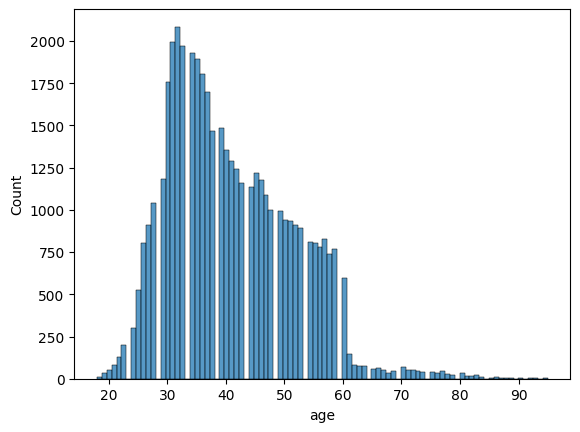

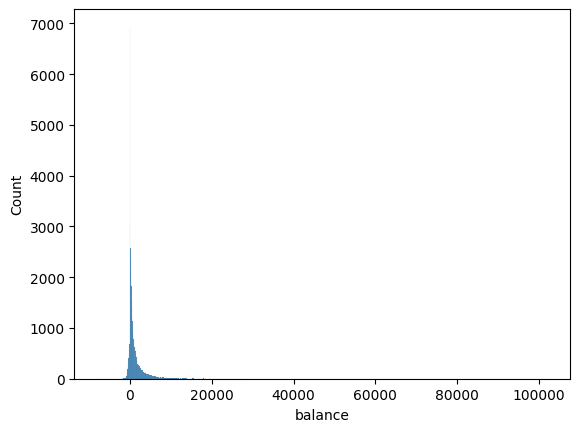

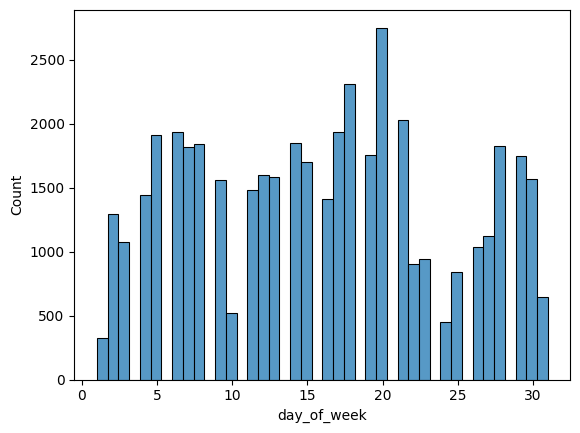

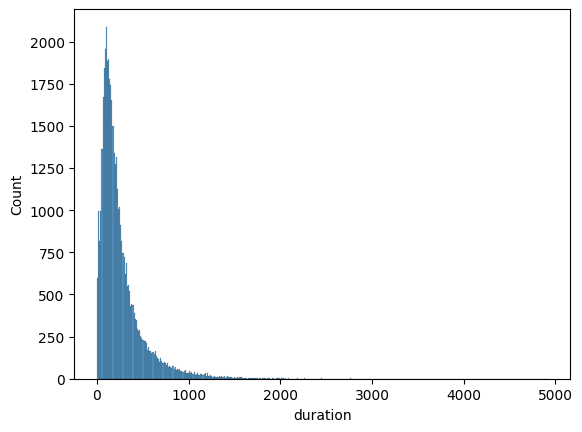

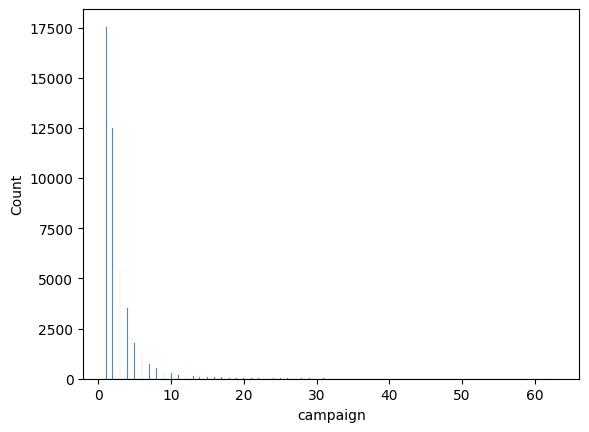

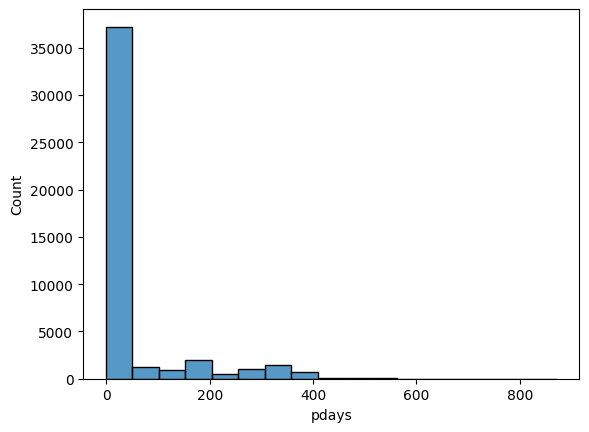

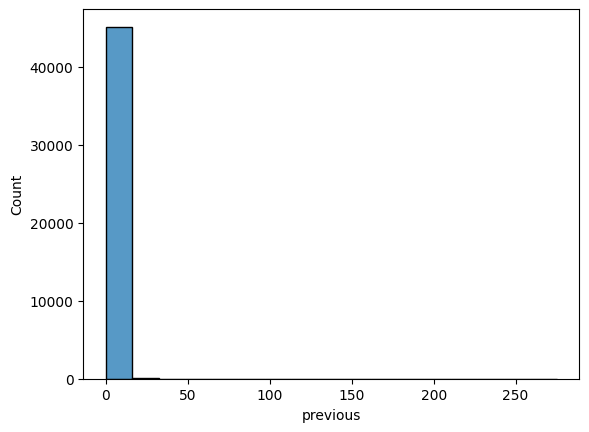

In [31]:
for i in df.select_dtypes(include='number').columns:
  sns.histplot(df[i])
  plt.show()

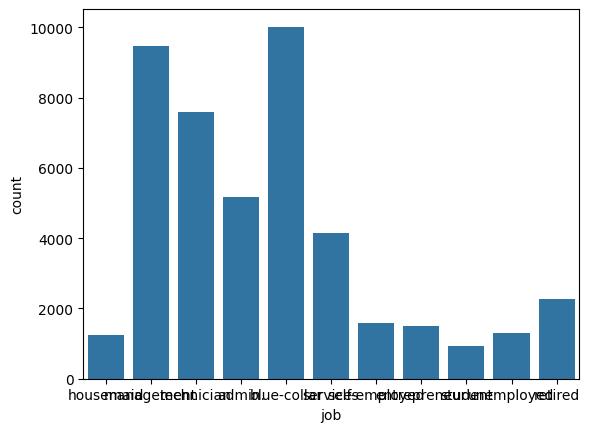

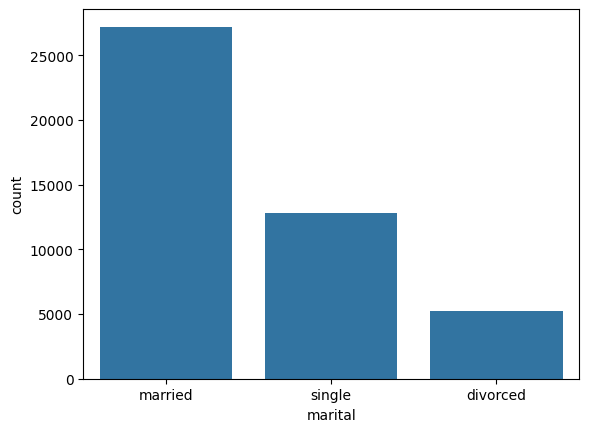

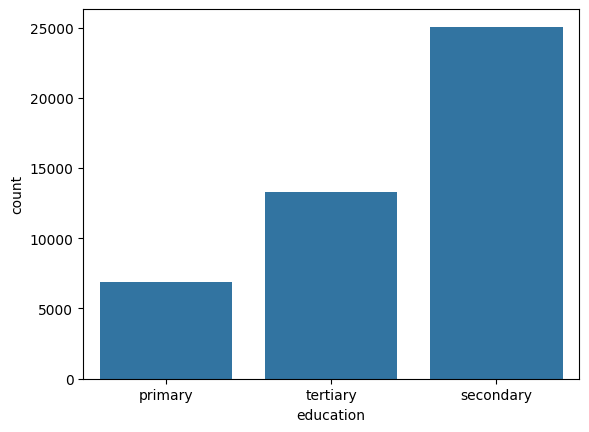

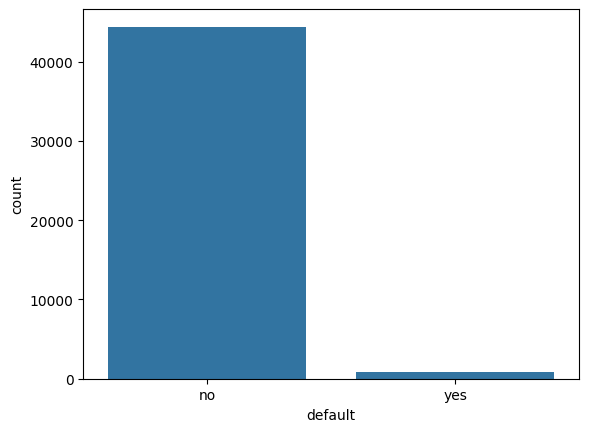

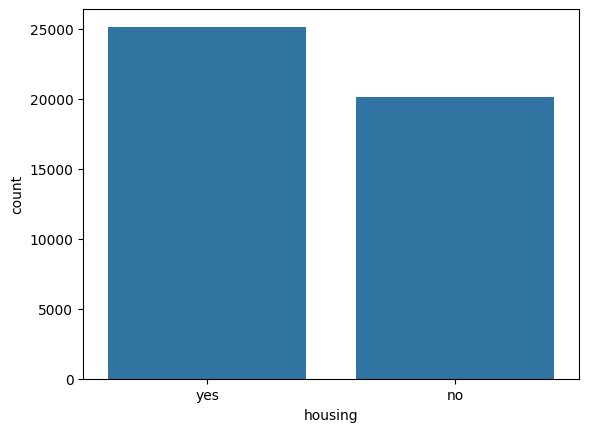

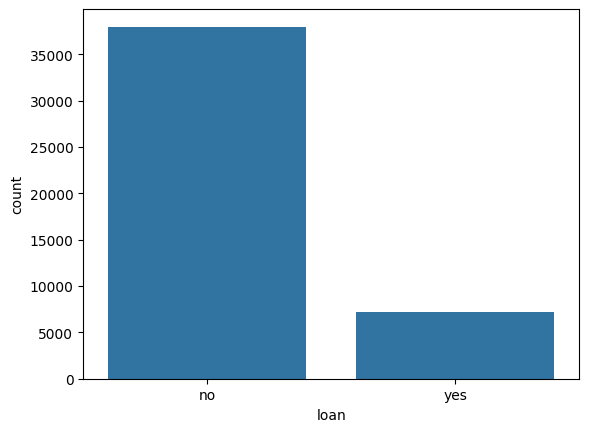

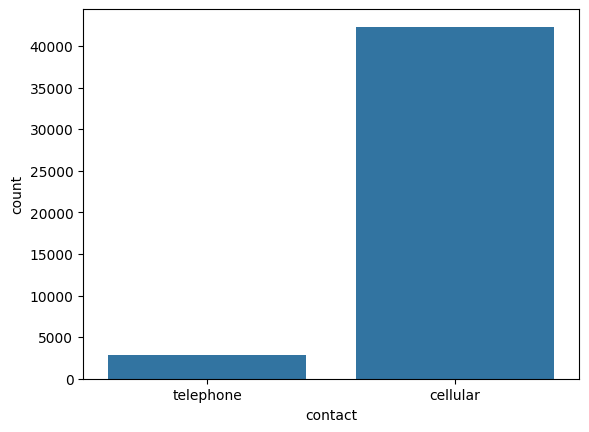

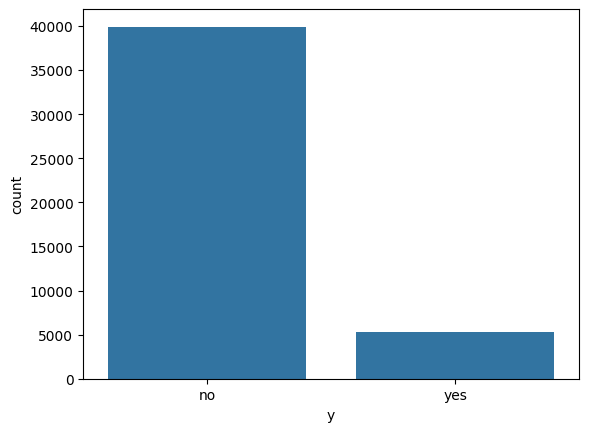

In [32]:
for i in df.select_dtypes(include='object').columns:
  sns.countplot(data=df,x=i)
  plt.show()

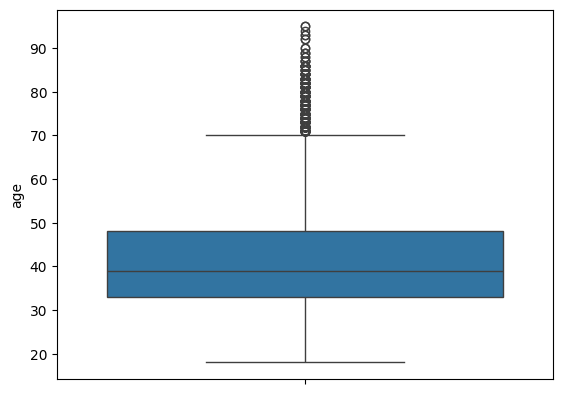

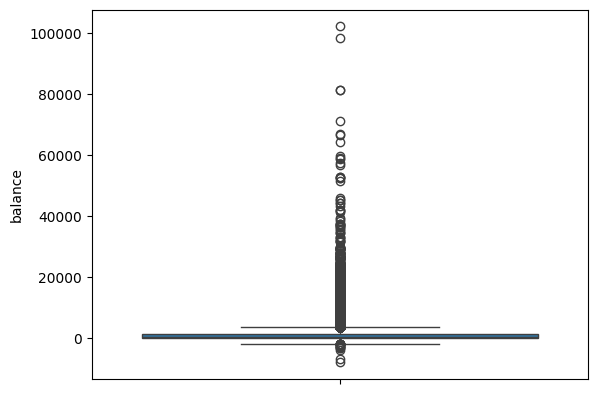

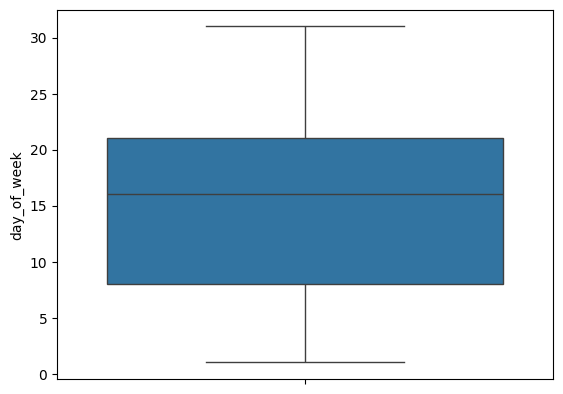

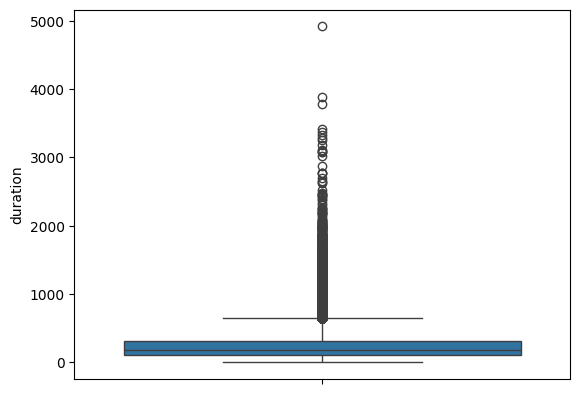

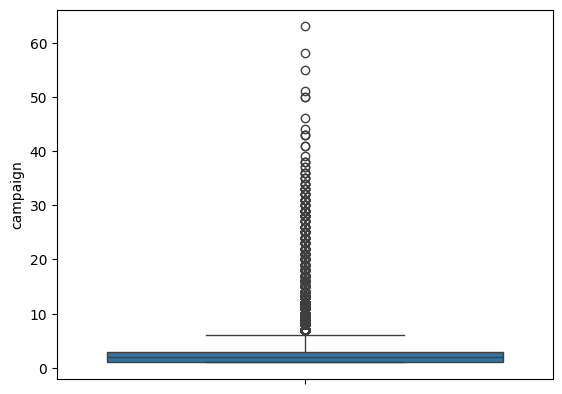

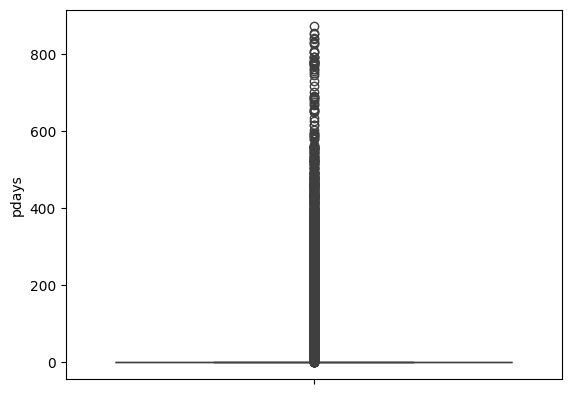

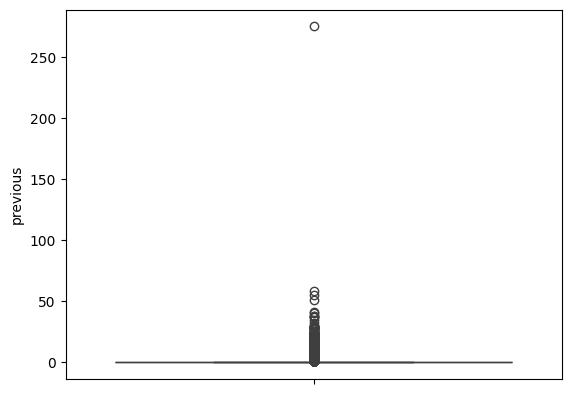

In [33]:
for i in df.select_dtypes(include='number').columns:
  sns.boxplot(df[i])
  plt.show()

In [34]:
df.columns

Index(['age', 'job', 'marital', 'education', 'default', 'balance', 'housing',
       'loan', 'contact', 'day_of_week', 'month', 'duration', 'campaign',
       'pdays', 'previous', 'y'],
      dtype='object')

In [35]:
cols=['age', 'balance','campaign','duration']
for i in df[cols]:
  Q1 = df[i].quantile(0.25)
  Q3 = df[i].quantile(0.75)
  IQR = Q3 - Q1
  df = df[(df[i] >= Q1 - 1.5*IQR) & (df[i] <= Q3 + 1.5*IQR)]

In [36]:
df['previous'] = df['previous'].apply(lambda x: 13 if x > 13 else x)


In [37]:
df['pdays'] = df['pdays'].apply(lambda x: (x/5) if x > -1 else x)


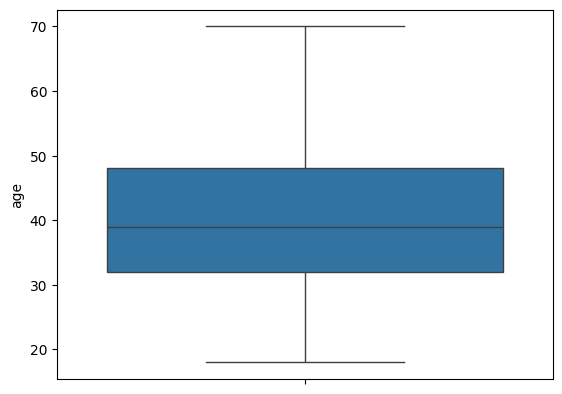

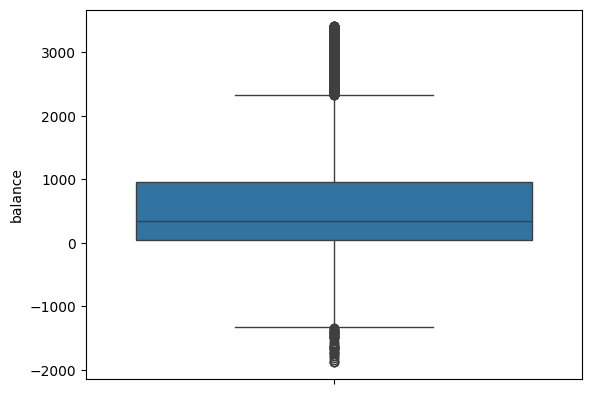

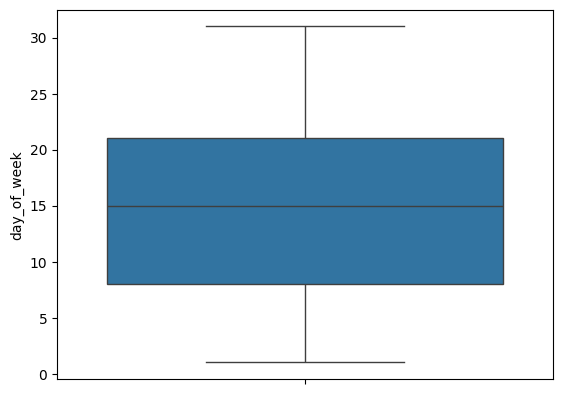

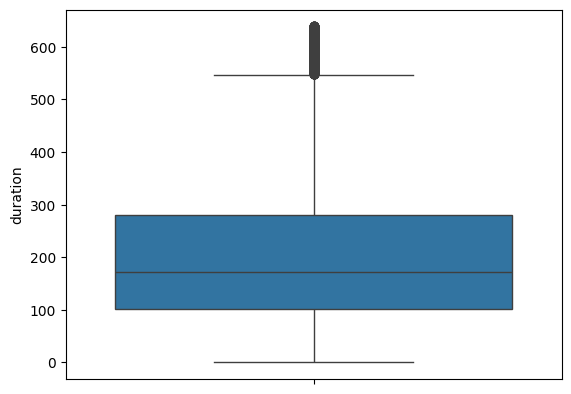

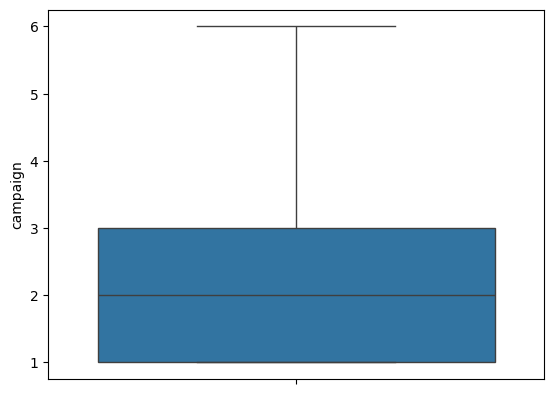

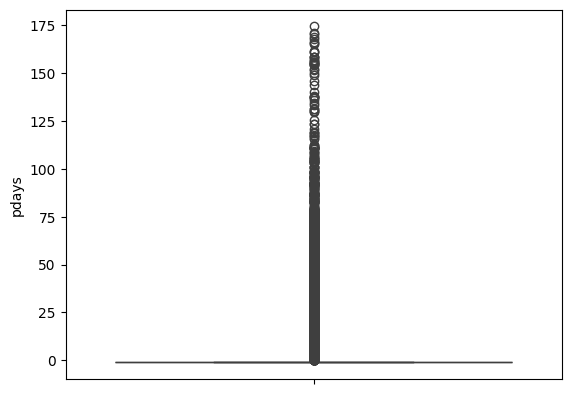

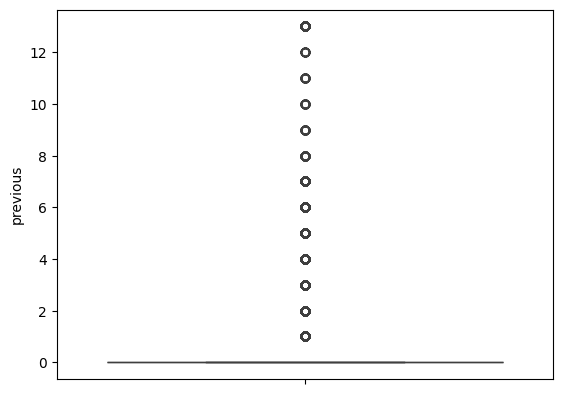

In [38]:
for i in df.select_dtypes(include='number').columns:
  sns.boxplot(df[i])
  plt.show()

In [39]:
from scipy.stats.mstats import winsorize

df['balance'] = winsorize(df['balance'], limits=[0.03, 0.07])  # تقليم 1% من الأعلى والأسفل


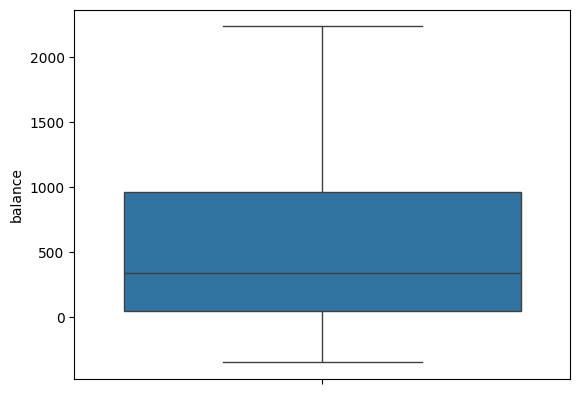

In [40]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.boxplot(df['balance'])
plt.show()


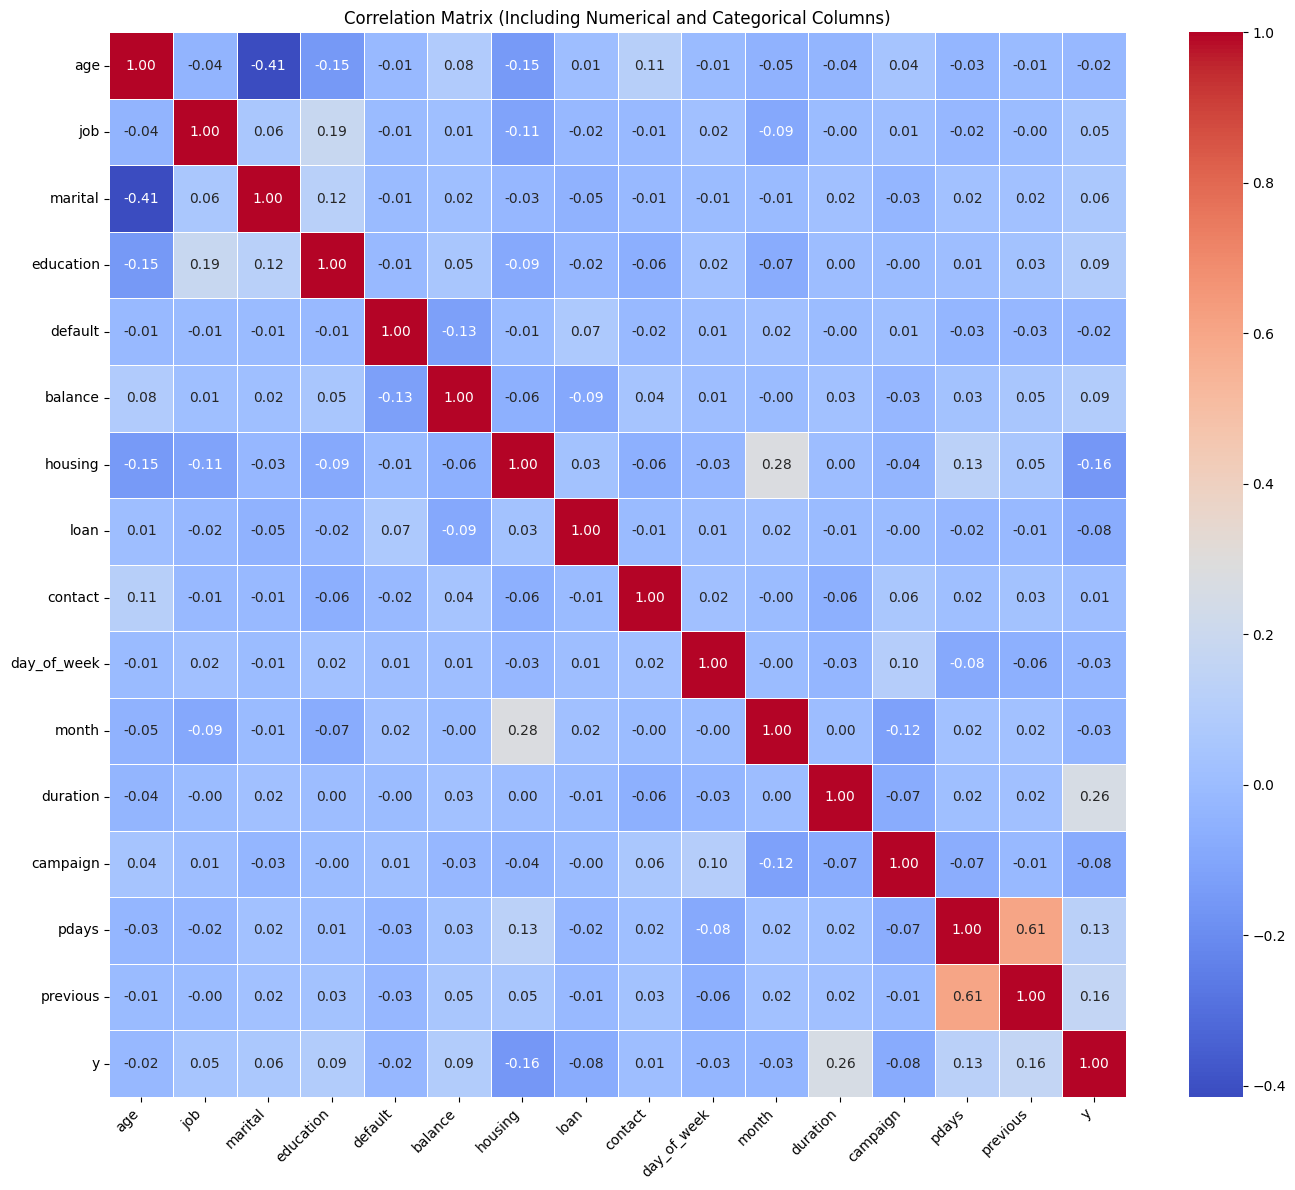

In [41]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder

df_encoded = df.copy()
le = LabelEncoder()

# Apply label encoding on object **or** category dtype
for col in df_encoded.columns:
    if df_encoded[col].dtype == 'object' or str(df_encoded[col].dtype) == 'category':
        df_encoded[col] = le.fit_transform(df_encoded[col].astype(str))

corr_matrix = df_encoded.corr()

plt.figure(figsize=(14, 12))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', linewidths=0.5, fmt='.2f')
plt.title('Correlation Matrix (Including Numerical and Categorical Columns)')
plt.xticks(rotation=45, ha='right')
plt.yticks(rotation=0)
plt.tight_layout()
plt.show()


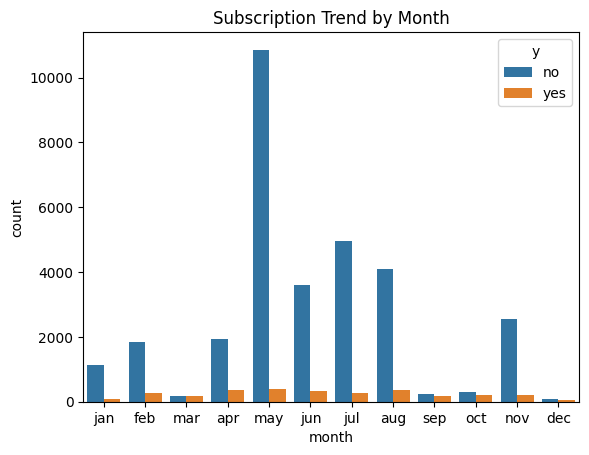

In [43]:
sns.countplot(x='month', hue='y', data=df, order=[
    'jan','feb','mar','apr','may','jun','jul','aug','sep','oct','nov','dec'])
plt.title('Subscription Trend by Month')
plt.show()


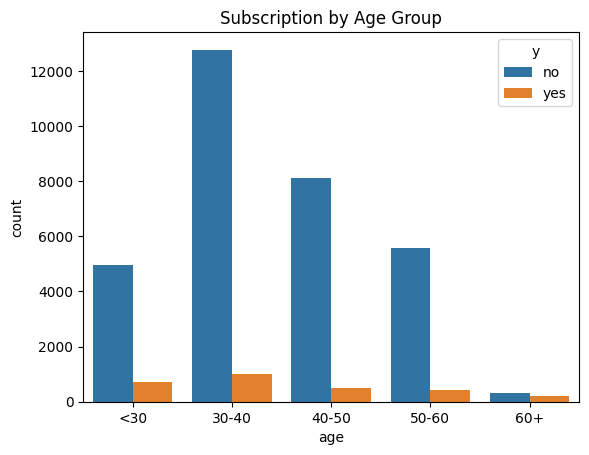

In [44]:
# إنشاء فئات عمرية
df['age'] = pd.cut(df['age'].astype(float), bins=[0, 30, 40, 50, 60, 100],
                                 labels=['<30', '30-40', '40-50', '50-60', '60+'])

sns.countplot(x='age', hue='y', data=df)
plt.title('Subscription by Age Group')
plt.show()


# *visualization*

In [45]:
!pip install --upgrade plotly cufflinks


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 14.8/14.8 MB 109.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.6/1.6 MB 90.0 MB/s eta 0:00:00
  Attempting uninstall: plotly
    Found existing installation: plotly 5.24.1
    Uninstalling plotly-5.24.1:
      Successfully uninstalled plotly-5.24.1


# improting libarary


In [46]:
from plotly import __version__
from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot
import cufflinks as cf
import plotly.graph_objs as go
init_notebook_mode(connected=True)

cf.go_offline()

# 1.  **Histogram — Age Distribution**
## Displays how clients are distributed by age.

In [48]:

# Plot the histogram for the 'age' column in your dataframe
df['age'].plot(kind='hist', figsize=(8, 5), bins=30, color='teal', edgecolor='black')

# Add a title to the histogram
plt.title('Age Distribution')

# Add y-label (Frequency)
plt.ylabel('Frequency')

# Add x-label (Age)
plt.xlabel('Age')

# Show the plot
plt.show()


TypeError: no numeric data to plot

In [49]:

import plotly.express as px

In [50]:
# Histogram using Plotly Express
fig = px.histogram(df, x='age', nbins=30, title='Age Distribution')
fig.update_layout(xaxis_title='Age', yaxis_title='Frequency')
fig.show()


# 1.Line Plot — Contacts Over Months
## Visualizes how many contacts were made in each month.

In [51]:
# Example line plot
month_counts = df['age'].value_counts().sort_index()
fig = px.line(x=month_counts.index, y=month_counts.values, title='Ages Count')
fig.update_layout(xaxis_title='Age', yaxis_title='Count')
fig.show()


3. 📊 Area Plot — Education Distribution

In [52]:
edu_counts = df['education'].value_counts()
fig = px.area(x=edu_counts.index, y=edu_counts.values,
              labels={'x': 'Education', 'y': 'Count'},
              title='Education Level Distribution')
fig.show()


 📊 Bar Chart — Job Category Count

In [53]:
job_counts = df['job'].value_counts()
fig = px.bar(x=job_counts.index, y=job_counts.values,
             labels={'x': 'Job', 'y': 'Count'},
             title='Job Category Distribution')
fig.show()


# **Pie Chart — Housing Loan Status**

In [54]:
fig = px.pie(df, names='housing', title='Housing Loan Distribution')
fig.show()


# **Box Plot — Age by Loan Status**

In [55]:
fig = px.box(df, x='loan', y='age', title='Age Distribution by Loan Status')
fig.show()


**Fearure** **Engineering**

In [56]:
df_encoded.head()

age  job  marital  education  default  balance  housing  loan  contact  \
27859   45    3        1          0        0     1526        1     0        1   
28326   56    4        2          2        0      545        1     0        0   
28325   37    9        1          2        0      183        1     0        0   
28324   34    0        2          1        0      391        1     0        0   
28323   35    1        1          1        0      645        1     0        0   

       day_of_week  month  duration  campaign  pdays  previous  y  
27859           28      4       109         1   -1.0         0  0  
28326           29      4        86         1   -1.0         0  0  
28325           29      4        51         1   51.6         1  0  
28324           29      4        77         1   53.0         2  0  
28323           29      4       114         1   -1.0         0  0

In [57]:
df['no_previous_contact'] = df['pdays'].apply(lambda x: 1 if x == -1 else 0)
df['pdays'] = df['pdays'].replace(-1, df['pdays'].max() + 1)


In [58]:
df['total_contacts'] = df['campaign'] + df['previous']


In [59]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
scale_cols = ['balance', 'pdays', 'previous', 'campaign', 'total_contacts']
df[scale_cols] = scaler.fit_transform(df[scale_cols])


In [60]:
df.drop(['duration', 'age'], axis=1, inplace=True)


In [61]:
from sklearn.preprocessing import LabelEncoder

categorical_cols = ['job', 'marital', 'education', 'contact', 'month', 'day_of_week']
for col in categorical_cols:
    le = LabelEncoder()
    df[col] = le.fit_transform(df[col])


In [62]:
df.head()

job  marital  education default   balance housing loan  contact  \
27859    3        1          0      no  1.279668     yes   no        1   
28326    4        2          2      no -0.077229     yes   no        0   
28325    9        1          2      no -0.577939     yes   no        0   
28324    0        2          1      no -0.290238     yes   no        0   
28323    1        1          1      no  0.061089     yes   no        0   

       day_of_week  month  campaign     pdays  previous   y  \
27859           27      4 -0.857949  0.471562 -0.345170  no   
28326           28      4 -0.857949  0.471562 -0.345170  no   
28325           28      4 -0.857949 -1.930154  0.277042  no   
28324           28      4 -0.857949 -1.902950  0.899254  no   
28323           28      4 -0.857949  0.471562 -0.345170  no   

       no_previous_contact  total_contacts  
27859                    1       -0.817037  
28326                    1       -0.817037  
28325                    0       -0.332725  
28324                    0        0.151587  
28323                    1       -0.817037

In [63]:
binary_cols = ['default', 'housing', 'loan', 'y']
df[binary_cols] = df[binary_cols].replace({'yes': 1, 'no': 0})


<ipython-input-63-64c378f630fa>:2: FutureWarning:

Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`



In [65]:
df.head()

job  marital  education  default   balance  housing  loan  contact  \
27859    3        1          0        0  1.279668        1     0        1   
28326    4        2          2        0 -0.077229        1     0        0   
28325    9        1          2        0 -0.577939        1     0        0   
28324    0        2          1        0 -0.290238        1     0        0   
28323    1        1          1        0  0.061089        1     0        0   

       day_of_week  month  campaign     pdays  previous  no_previous_contact  \
27859           27      4 -0.857949  0.471562 -0.345170                    1   
28326           28      4 -0.857949  0.471562 -0.345170                    1   
28325           28      4 -0.857949 -1.930154  0.277042                    0   
28324           28      4 -0.857949 -1.902950  0.899254                    0   
28323           28      4 -0.857949  0.471562 -0.345170                    1   

       total_contacts  y  
27859       -0.817037  0  
28326       -0.817037  0  
28325       -0.332725  0  
28324        0.151587  0  
28323       -0.817037  0

Building The model



In [77]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV
from sklearn.preprocessing import StandardScaler, Normalizer, LabelEncoder
from sklearn.decomposition import PCA
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, confusion_matrix
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline


In [79]:
df.head()

job  marital  education  default   balance  housing  loan  contact  \
27859    3        1          0        0  1.279668        1     0        1   
28326    4        2          2        0 -0.077229        1     0        0   
28325    9        1          2        0 -0.577939        1     0        0   
28324    0        2          1        0 -0.290238        1     0        0   
28323    1        1          1        0  0.061089        1     0        0   

       day_of_week  month  campaign     pdays  previous  no_previous_contact  \
27859           27      4 -0.857949  0.471562 -0.345170                    1   
28326           28      4 -0.857949  0.471562 -0.345170                    1   
28325           28      4 -0.857949 -1.930154  0.277042                    0   
28324           28      4 -0.857949 -1.902950  0.899254                    0   
28323           28      4 -0.857949  0.471562 -0.345170                    1   

       total_contacts  y  
27859       -0.817037  0  
28326       -0.817037  0  
28325       -0.332725  0  
28324        0.151587  0  
28323       -0.817037  0

In [80]:
# Prepare data
X = df.drop('y', axis=1)
y = df['y']

In [81]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)


In [82]:
models = {
    'Logistic Regression': LogisticRegression(),
    'Random Forest': RandomForestClassifier(),
    'SVM': SVC()
}

param_grid = {
    'Logistic Regression': {'C': [0.001, 0.1, 1, 10], 'penalty': ['l1', 'l2'], 'solver': ['liblinear']},
    'Random Forest': {'n_estimators': [50, 100, 200], 'max_depth': [10, 20, None]},
    'SVM': {'C': [0.01, 0.1, 1], 'kernel': ['linear', 'rbf']}
}


In [83]:
best_models = {}
for model_name, model in models.items():
    print(f"Training {model_name} using GridSearchCV...")
    grid_search = GridSearchCV(model, param_grid[model_name], cv=5)
    grid_search.fit(X_train, y_train)
    best_models[model_name] = grid_search.best_estimator_


Training Logistic Regression using GridSearchCV...
Training Random Forest using GridSearchCV...
Training SVM using GridSearchCV...


In [84]:
print(best_models)

{'Logistic Regression': LogisticRegression(C=0.001, penalty='l1', solver='liblinear'), 'Random Forest': RandomForestClassifier(max_depth=10, n_estimators=200), 'SVM': SVC(C=0.01, kernel='linear')}


In [85]:
for model_name, model in best_models.items():
    print(f"\nEvaluating {model_name} with Cross-Validation...")
    cv_scores = cross_val_score(model, X_train, y_train, cv=5, scoring='accuracy')  # 5-fold cross-validation
    print(f"Cross-validation scores for {model_name}: {cv_scores}")
    print(f"Mean CV accuracy for {model_name}: {np.mean(cv_scores)}")



Evaluating Logistic Regression with Cross-Validation...
Cross-validation scores for Logistic Regression: [0.91704499 0.91725134 0.91725134 0.91683863 0.91702786]
Mean CV accuracy for Logistic Regression: 0.9170828323509607

Evaluating Random Forest with Cross-Validation...
Cross-validation scores for Random Forest: [0.92055303 0.92199752 0.91807676 0.91952125 0.91909185]
Mean CV accuracy for Random Forest: 0.9198480846820992

Evaluating SVM with Cross-Validation...
Cross-validation scores for SVM: [0.91725134 0.91725134 0.91725134 0.91704499 0.91723426]
Mean CV accuracy for SVM: 0.9172066543236536


In [86]:
best_model = best_models['Random Forest']

y_pred = best_model.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, average='weighted')
recall = recall_score(y_test, y_pred, average='weighted')
f1 = f1_score(y_test, y_pred, average='weighted')
roc_auc = roc_auc_score(y_test, best_model.predict_proba(X_test)[:, 1])

print(f'\nEvaluation Metrics for {best_model}:')
print(f'Accuracy: {accuracy}')
print(f'Precision: {precision}')
print(f'Recall: {recall}')
print(f'F1 Score: {f1}')
print(f'ROC AUC: {roc_auc}')



Evaluation Metrics for RandomForestClassifier(max_depth=10, n_estimators=200):
Accuracy: 0.9204622051035147
Precision: 0.9019149384186406
Recall: 0.9204622051035147
F1 Score: 0.892207698398784
ROC AUC: 0.8337354731022603


Checking the impact of scaling on accuracy


In [87]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

best_model.fit(X_train_scaled, y_train)
y_pred_scaled = best_model.predict(X_test_scaled)

accuracy_scaled = accuracy_score(y_test, y_pred_scaled)
print(f'\nAccuracy after Scaling: {accuracy_scaled}')
# after training founded  Scaling had almost no effect


Accuracy after Scaling: 0.9194992778045258


Checking the impact of normalization on accuracy

In [88]:
normalizer = Normalizer()
X_train_normalized = normalizer.fit_transform(X_train)
X_test_normalized = normalizer.transform(X_test)

best_model.fit(X_train_normalized, y_train)
y_pred_normalized = best_model.predict(X_test_normalized)

accuracy_normalized = accuracy_score(y_test, y_pred_normalized)
print(f'Accuracy after Normalization: {accuracy_normalized}')
# after tring we found slight drop in accuracy

Accuracy after Normalization: 0.9170919595570535


Checking the impact of PCA (Dimensionality Reduction)

In [89]:
pca = PCA(n_components=2)
X_train_pca = pca.fit_transform(X_train)
X_test_pca = pca.transform(X_test)

best_model.fit(X_train_pca, y_train)
y_pred_pca = best_model.predict(X_test_pca)

accuracy_pca = accuracy_score(y_test, y_pred_pca)
print(f'Accuracy after PCA: {accuracy_pca}')


Accuracy after PCA: 0.9163216177178622


PCA slightly reduced accuracy


***Conclusion::***
Random Forest gave the highest accuracy.

Scaling had almost no effect (accuracy stayed high).

Normalization and PCA caused a small decrease, but accuracy remained above 91.6%.
This shows the model is stable and robust across different preprocessing techniques.bold text

Visualizing results (Confusion Matrix)

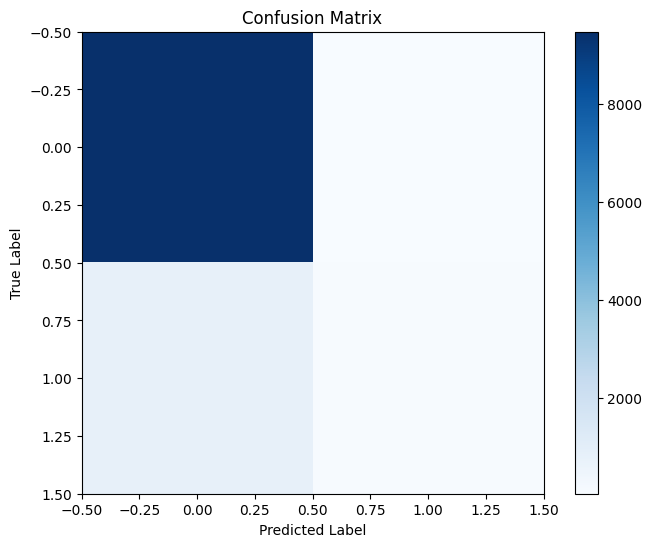

In [90]:
conf_matrix = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(8, 6))
plt.imshow(conf_matrix, cmap='Blues', interpolation='nearest')
plt.title('Confusion Matrix')
plt.colorbar()
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()


ponus


In [ ]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.metrics import adjusted_rand_score
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
import seaborn as sns


In [ ]:
true_labels = df['y']

X = df.drop(columns=['y'])

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)


In [ ]:
num_classes = df['y'].nunique()

kmeans = KMeans(n_clusters=num_classes, random_state=42)
kmeans_labels = kmeans.fit_predict(X_scaled)

ari_score = adjusted_rand_score(true_labels, kmeans_labels)
print("Adjusted Rand Index (ARI):", ari_score)


In [ ]:
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)

plt.figure(figsize=(8, 6))
sns.scatterplot(x=X_pca[:, 0], y=X_pca[:, 1], hue=kmeans_labels, palette='Set2', s=50)
plt.title('KMeans Clustering Results (PCA reduced)')
plt.xlabel('PCA Component 1')
plt.ylabel('PCA Component 2')
plt.legend(title='Cluster')
plt.show()
